### GW RIDING W/ PLUS AND CROSS POLARIZATIONS

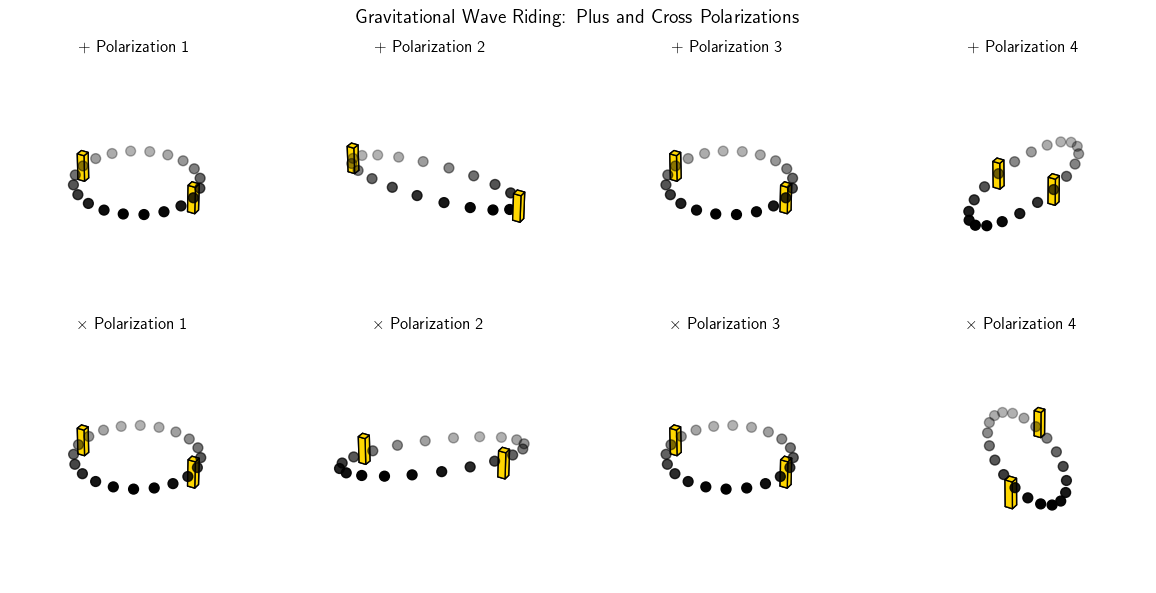

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to create a 3D cube
def create_cube(x, y, z, size):
    vertices = np.array([
        [x - size/2, y - size/2, z - size/2],
        [x + size/2, y - size/2, z - size/2],
        [x + size/2, y + size/2, z - size/2],
        [x - size/2, y + size/2, z - size/2],
        [x - size/2, y - size/2, z + size/2],
        [x + size/2, y - size/2, z + size/2],
        [x + size/2, y + size/2, z + size/2],
        [x - size/2, y + size/2, z + size/2]
    ])
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right face
        [vertices[0], vertices[3], vertices[7], vertices[4]]   # Left face
    ]
    return Poly3DCollection(faces, facecolors='gold', edgecolors='black', linewidths=1)

# Function to generate particles in a ring
def generate_particles(num_particles, radius):
    theta = np.linspace(0, 2 * np.pi, num_particles, endpoint=False)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.vstack((x, y)).T

# Parameters
num_particles = 20  # More points for a smooth effect
radius = 4
cube_size = 0.5

# Generate particles
particles = generate_particles(num_particles, radius)

# Define deformation states
deformations_plus = [
    (1, 1),  # Original circle
    (1.5, 0.5),  # Stretched in x
    (1, 1),  # Back to circle
    (0.5, 1.5)  # Stretched in y
]

deformations_cross = [
    (1, 1),  # Original circle
    (1.5, 0.5),  # Rotated version of plus along x (diagonal stretch)
    (1, 1),  # Back to circle
    (0.5, 1.5)  # Rotated version of plus along y (diagonal stretch)
]

# Create a figure with subplots for plus and cross polarizations
fig, axes = plt.subplots(2, 4, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot plus polarization
for i, ax in enumerate(axes[0]):
    stretch_x, stretch_y = deformations_plus[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x, particles[:, 1] * stretch_y, np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)

    '''# Gold cubes
    for pos in [(4, 0), (-4, 0)]:
        cube = create_cube(pos[0], pos[1], 0, cube_size)
        ax.add_collection3d(cube)'''

    # Gold cubes (apply same deformation but keep them on original axis)
    for pos in [(4, 0), (-4, 0)]:
        cube_x = pos[0] * stretch_x  # Stretch in x direction
        cube_y = pos[1] * stretch_y  # Stretch in y direction
        cube = create_cube(cube_x, cube_y, 0, cube_size)
        ax.add_collection3d(cube)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 1)
    ax.axis('off')
    ax.set_title(f"+ Polarization {i+1}")

'''# Plot cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_cross[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x - particles[:, 1] * stretch_y, 
                                    particles[:, 0] * stretch_y + particles[:, 1] * stretch_x, 
                                    np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)
# Apply 90° rotation for the cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]  # Use the same deformation as the plus case
    # Apply 90° rotation (swap and negate)
    deformed_particles = np.vstack((-particles[:, 1] * stretch_y / np.sqrt(2), 
                                    particles[:, 0] * stretch_x / np.sqrt(2), 
                                    np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)'''



# Apply 45° counterclockwise rotation for the cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]  # Use the same deformation as the plus case

    # Apply stretching first
    x_stretched = particles[:, 0] * stretch_x
    y_stretched = particles[:, 1] * stretch_y

    # Apply 45° counterclockwise rotation
    x_rot = (x_stretched - y_stretched) / np.sqrt(2)
    y_rot = (x_stretched + y_stretched) / np.sqrt(2)

    deformed_particles = np.vstack((x_rot, y_rot, np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)

    '''# Gold cubes
    for pos in [(4, 0), (-4, 0)]:
        cube = create_cube(pos[0], pos[1], 0, cube_size)
        ax.add_collection3d(cube)'''

    '''# Gold cubes (stretch AND rotate)
    for pos in [(4, 0), (-4, 0)]:
        # Stretch first
        cube_x = pos[0] * stretch_x
        cube_y = pos[1] * stretch_y

        # Rotate 45°
        cube_x_rot = (cube_x - cube_y) / np.sqrt(2)
        cube_y_rot = (cube_x + cube_y) / np.sqrt(2)

        cube = create_cube(cube_x_rot, cube_y_rot, 0, cube_size)
        ax.add_collection3d(cube)'''
 

    # Gold cubes (deform along 45° axis but stay in correct position)
    for pos in [(4, 0), (-4, 0)]:
        if i in [0, 2]:  # First and third plots -> identical to plus case
            cube_x = pos[0]
            cube_y = pos[1]
        elif i == 1:  # Second and fourth plots -> deform along 45° axis
            cube_x = (pos[0] * stretch_x - pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
        elif i == 3:
            # Stretch the cube position in the diagonal (45°) direction
            cube_x = (pos[0] * stretch_x + pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (-pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)

        cube = create_cube(cube_x, cube_y, 0, cube_size)
        ax.add_collection3d(cube)

    

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 1)
    ax.axis('off')
    ax.set_title(f"× Polarization {i+1}")

plt.suptitle("Gravitational Wave Riding: Plus and Cross Polarizations", fontsize=14)
plt.tight_layout()
plt.show()

### TOP VIEW PROJECTION

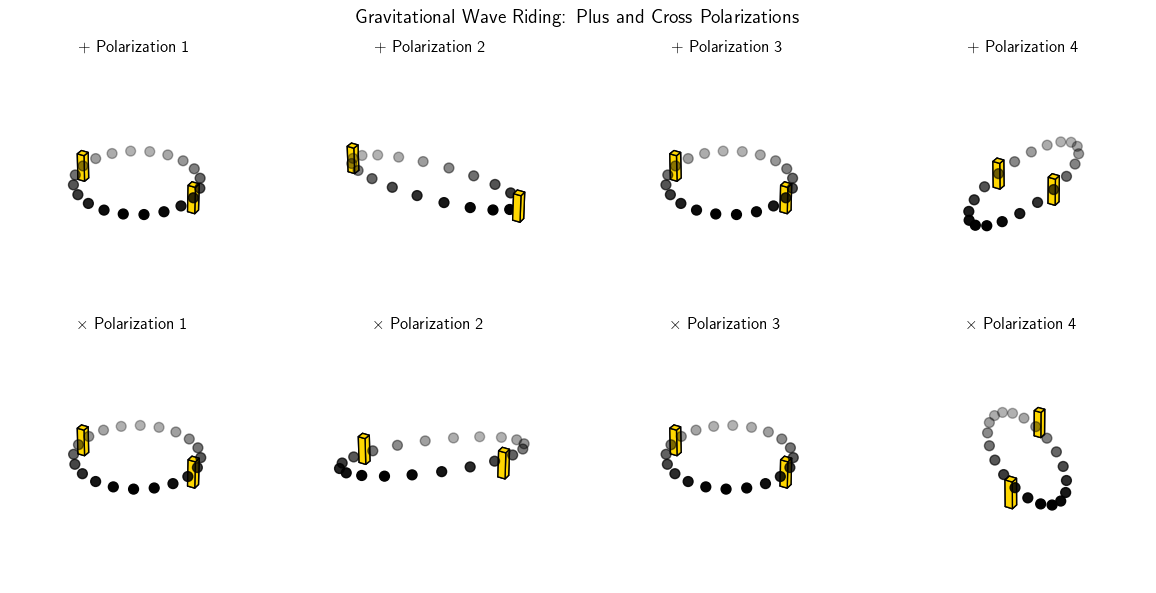

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to create a 3D cube
def create_cube(x, y, z, size):
    vertices = np.array([
        [x - size/2, y - size/2, z - size/2],
        [x + size/2, y - size/2, z - size/2],
        [x + size/2, y + size/2, z - size/2],
        [x - size/2, y + size/2, z - size/2],
        [x - size/2, y - size/2, z + size/2],
        [x + size/2, y - size/2, z + size/2],
        [x + size/2, y + size/2, z + size/2],
        [x - size/2, y + size/2, z + size/2]
    ])
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right face
        [vertices[0], vertices[3], vertices[7], vertices[4]]   # Left face
    ]
    return Poly3DCollection(faces, facecolors='gold', edgecolors='black', linewidths=1)

# Function to generate particles in a ring
def generate_particles(num_particles, radius):
    theta = np.linspace(0, 2 * np.pi, num_particles, endpoint=False)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.vstack((x, y)).T

# Parameters
num_particles = 20  # More points for a smooth effect
radius = 4
cube_size = 0.5

# Generate particles
particles = generate_particles(num_particles, radius)

# Define deformation states
deformations_plus = [
    (1, 1),  # Original circle
    (1.5, 0.5),  # Stretched in x
    (1, 1),  # Back to circle
    (0.5, 1.5)  # Stretched in y
]

deformations_cross = [
    (1, 1),  # Original circle
    (1.5, 0.5),  # Rotated version of plus along x (diagonal stretch)
    (1, 1),  # Back to circle
    (0.5, 1.5)  # Rotated version of plus along y (diagonal stretch)
]

# Create a figure with subplots for plus and cross polarizations
fig, axes = plt.subplots(2, 4, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot plus polarization
for i, ax in enumerate(axes[0]):
    stretch_x, stretch_y = deformations_plus[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x, particles[:, 1] * stretch_y, np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)

    '''# Gold cubes
    for pos in [(4, 0), (-4, 0)]:
        cube = create_cube(pos[0], pos[1], 0, cube_size)
        ax.add_collection3d(cube)'''

    # Gold cubes (apply same deformation but keep them on original axis)
    for pos in [(4, 0), (-4, 0)]:
        cube_x = pos[0] * stretch_x  # Stretch in x direction
        cube_y = pos[1] * stretch_y  # Stretch in y direction
        cube = create_cube(cube_x, cube_y, 0, cube_size)
        ax.add_collection3d(cube)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 1)
    ax.axis('off')
    ax.set_title(f"+ Polarization {i+1}")

'''# Plot cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_cross[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x - particles[:, 1] * stretch_y, 
                                    particles[:, 0] * stretch_y + particles[:, 1] * stretch_x, 
                                    np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)
# Apply 90° rotation for the cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]  # Use the same deformation as the plus case
    # Apply 90° rotation (swap and negate)
    deformed_particles = np.vstack((-particles[:, 1] * stretch_y / np.sqrt(2), 
                                    particles[:, 0] * stretch_x / np.sqrt(2), 
                                    np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)'''



# Apply 45° counterclockwise rotation for the cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]  # Use the same deformation as the plus case

    # Apply stretching first
    x_stretched = particles[:, 0] * stretch_x
    y_stretched = particles[:, 1] * stretch_y

    # Apply 45° counterclockwise rotation
    x_rot = (x_stretched - y_stretched) / np.sqrt(2)
    y_rot = (x_stretched + y_stretched) / np.sqrt(2)

    deformed_particles = np.vstack((x_rot, y_rot, np.zeros(num_particles))).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], 0, color='black', s=50)

    '''# Gold cubes
    for pos in [(4, 0), (-4, 0)]:
        cube = create_cube(pos[0], pos[1], 0, cube_size)
        ax.add_collection3d(cube)'''

    '''# Gold cubes (stretch AND rotate)
    for pos in [(4, 0), (-4, 0)]:
        # Stretch first
        cube_x = pos[0] * stretch_x
        cube_y = pos[1] * stretch_y

        # Rotate 45°
        cube_x_rot = (cube_x - cube_y) / np.sqrt(2)
        cube_y_rot = (cube_x + cube_y) / np.sqrt(2)

        cube = create_cube(cube_x_rot, cube_y_rot, 0, cube_size)
        ax.add_collection3d(cube)'''
 

    # Gold cubes (deform along 45° axis but stay in correct position)
    for pos in [(4, 0), (-4, 0)]:
        if i in [0, 2]:  # First and third plots -> identical to plus case
            cube_x = pos[0]
            cube_y = pos[1]
        elif i == 1:  # Second and fourth plots -> deform along 45° axis
            cube_x = (pos[0] * stretch_x - pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
        elif i == 3:
            # Stretch the cube position in the diagonal (45°) direction
            cube_x = (pos[0] * stretch_x + pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (-pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)

        cube = create_cube(cube_x, cube_y, 0, cube_size)
        ax.add_collection3d(cube)

    

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 1)
    ax.axis('off')
    ax.set_title(f"× Polarization {i+1}")

plt.suptitle("Gravitational Wave Riding: Plus and Cross Polarizations", fontsize=14)
plt.tight_layout()
plt.show()

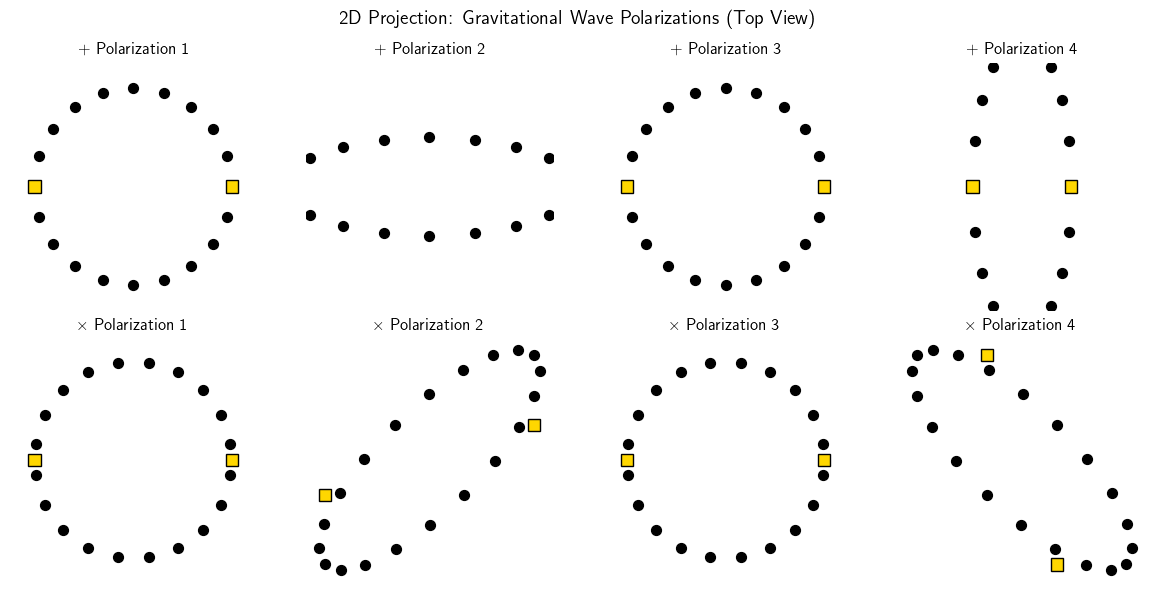

In [4]:
# Create a 2D projection (top view) of the polarizations
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plot plus polarization in 2D
for i, ax in enumerate(axes[0]):
    stretch_x, stretch_y = deformations_plus[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x, particles[:, 1] * stretch_y)).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], color='black', s=50)
    
    # Plot cubes
    for pos in [(4, 0), (-4, 0)]:
        cube_x = pos[0] * stretch_x
        cube_y = pos[1] * stretch_y
        ax.add_patch(plt.Rectangle((cube_x - cube_size/2, cube_y - cube_size/2), 
                                  cube_size, cube_size, 
                                  facecolor='gold', edgecolor='black'))
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"+ Polarization {i+1}")

# Plot cross polarization in 2D
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]
    
    # Apply stretching and rotation for particles
    x_stretched = particles[:, 0] * stretch_x
    y_stretched = particles[:, 1] * stretch_y
    x_rot = (x_stretched - y_stretched) / np.sqrt(2)
    y_rot = (x_stretched + y_stretched) / np.sqrt(2)
    ax.scatter(x_rot, y_rot, color='black', s=50)
    
    # Plot cubes with appropriate deformation
    for pos in [(4, 0), (-4, 0)]:
        if i in [0, 2]:  # Undeformed states
            cube_x = pos[0]
            cube_y = pos[1]
        elif i == 1:  # First deformation
            cube_x = (pos[0] * stretch_x - pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
        elif i == 3:  # Second deformation
            cube_x = (pos[0] * stretch_x + pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (-pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
            
        ax.add_patch(plt.Rectangle((cube_x - cube_size/2, cube_y - cube_size/2), 
                                  cube_size, cube_size, 
                                  facecolor='gold', edgecolor='black'))
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"× Polarization {i+1}")

plt.suptitle("2D Projection: Gravitational Wave Polarizations (Top View)", fontsize=14)
plt.tight_layout()
plt.show()

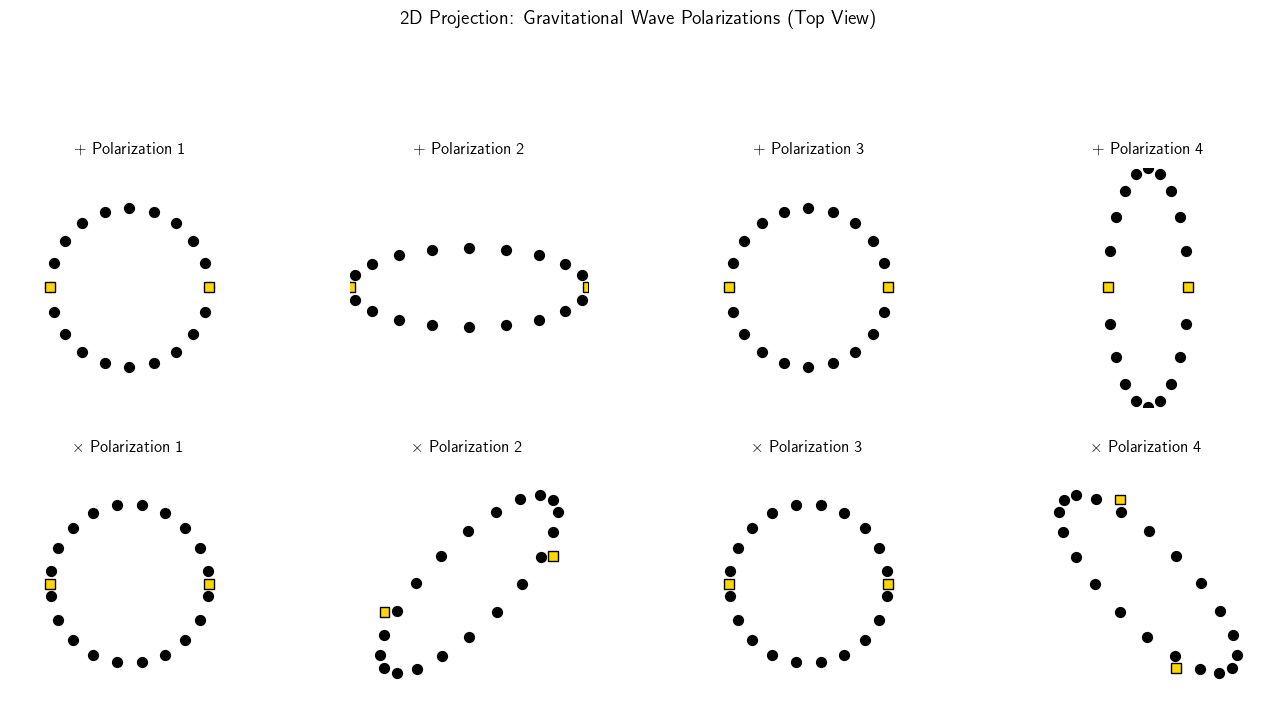

In [5]:
# Create a 2D projection (top view) with adjusted layout
fig, axes = plt.subplots(2, 4, figsize=(14, 7))  # Increased figure size

# Plot plus polarization in 2D
for i, ax in enumerate(axes[0]):
    stretch_x, stretch_y = deformations_plus[i]
    deformed_particles = np.vstack((particles[:, 0] * stretch_x, particles[:, 1] * stretch_y)).T
    ax.scatter(deformed_particles[:, 0], deformed_particles[:, 1], color='black', s=50)
    
    # Plot cubes
    for pos in [(4, 0), (-4, 0)]:
        cube_x = pos[0] * stretch_x
        cube_y = pos[1] * stretch_y
        ax.add_patch(plt.Rectangle((cube_x - cube_size/2, cube_y - cube_size/2), 
                                  cube_size, cube_size, 
                                  facecolor='gold', edgecolor='black'))
    
    ax.set_xlim(-6, 6)  # Slightly expanded limits
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"+ Polarization {i+1}", pad=10)  # Added padding to title

# Plot cross polarization in 2D
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]
    
    # Apply stretching and rotation for particles
    x_stretched = particles[:, 0] * stretch_x
    y_stretched = particles[:, 1] * stretch_y
    x_rot = (x_stretched - y_stretched) / np.sqrt(2)
    y_rot = (x_stretched + y_stretched) / np.sqrt(2)
    ax.scatter(x_rot, y_rot, color='black', s=50)
    
    # Plot cubes with appropriate deformation
    for pos in [(4, 0), (-4, 0)]:
        if i in [0, 2]:  # Undeformed states
            cube_x = pos[0]
            cube_y = pos[1]
        elif i == 1:  # First deformation
            cube_x = (pos[0] * stretch_x - pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
        elif i == 3:  # Second deformation
            cube_x = (pos[0] * stretch_x + pos[1] * stretch_y) / np.sqrt(2)
            cube_y = (-pos[0] * stretch_y + pos[1] * stretch_x) / np.sqrt(2)
            
        ax.add_patch(plt.Rectangle((cube_x - cube_size/2, cube_y - cube_size/2), 
                                  cube_size, cube_size, 
                                  facecolor='gold', edgecolor='black'))
    
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"× Polarization {i+1}", pad=10)

plt.suptitle("2D Projection: Gravitational Wave Polarizations (Top View)", fontsize=14, y=1.05)  # Adjusted title position
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()


/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_18581/468921720.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


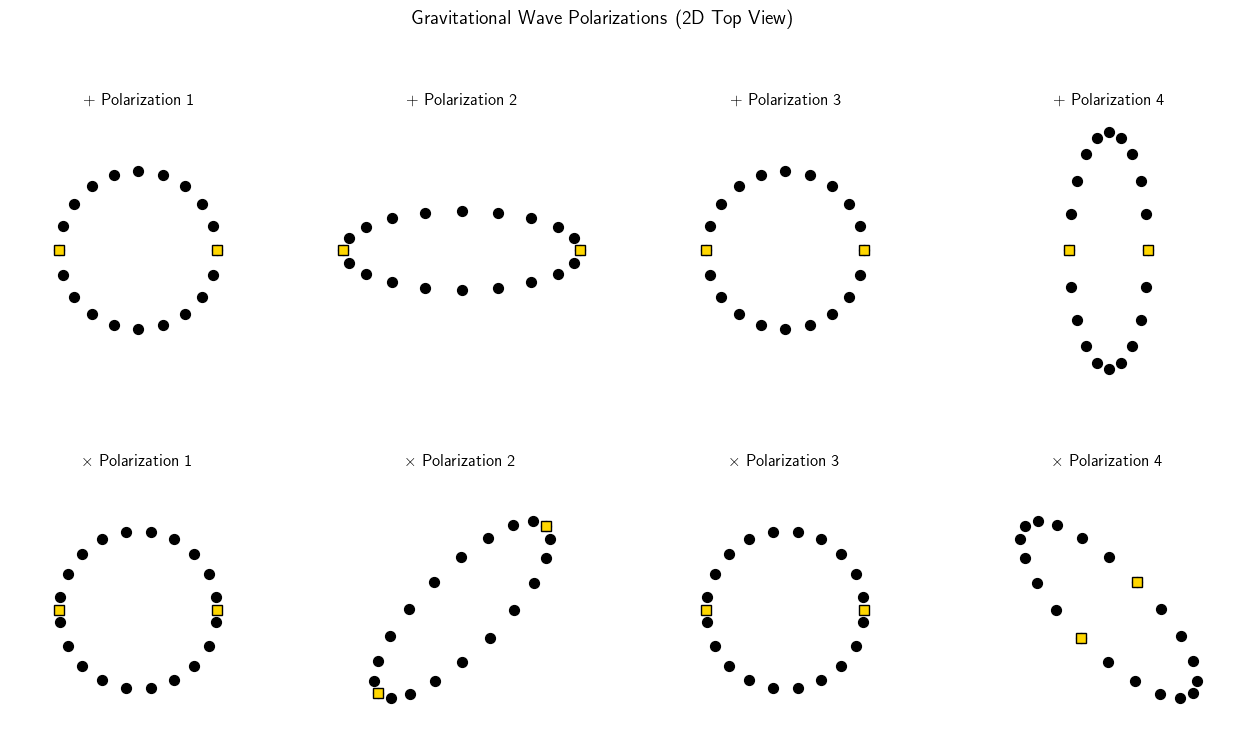

In [6]:
# Create a 2D projection with perfect spacing
fig = plt.figure(figsize=(16, 8))  # Wider figure
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.2)  # Custom grid spacing
axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(4)]
axes = np.array(axes).reshape(2, 4)

# Common settings
plot_limits = (-6.5, 6.5)
cube_positions = [(4, 0), (-4, 0)]

# Plot plus polarization
for i, ax in enumerate(axes[0]):
    stretch_x, stretch_y = deformations_plus[i]
    
    # Transform particles
    x = particles[:, 0] * stretch_x
    y = particles[:, 1] * stretch_y
    ax.scatter(x, y, color='black', s=50)
    
    # Transform cubes
    for px, py in cube_positions:
        cx = px * stretch_x
        cy = py * stretch_y
        ax.add_patch(plt.Rectangle((cx-cube_size/2, cy-cube_size/2), 
                     cube_size, cube_size,
                     facecolor='gold', edgecolor='black', lw=1))
    
    ax.set(xlim=plot_limits, ylim=plot_limits, aspect='equal')
    ax.axis('off')
    ax.set_title(f"+ Polarization {i+1}", pad=12, fontsize=12)

# Plot cross polarization
for i, ax in enumerate(axes[1]):
    stretch_x, stretch_y = deformations_plus[i]
    
    # Transform particles with rotation
    x = (particles[:, 0] * stretch_x - particles[:, 1] * stretch_y)/np.sqrt(2)
    y = (particles[:, 0] * stretch_x + particles[:, 1] * stretch_y)/np.sqrt(2)
    ax.scatter(x, y, color='black', s=50)
    
    # Transform cubes with rotation
    for px, py in cube_positions:
        if i in [0, 2]:  # Undeformed states
            cx, cy = px, py
        else:  # Rotated states
            cx = (px * stretch_x - py * stretch_y)/np.sqrt(2)
            cy = (px * stretch_x + py * stretch_y)/np.sqrt(2)
        
        ax.add_patch(plt.Rectangle((cx-cube_size/2, cy-cube_size/2), 
                     cube_size, cube_size,
                     facecolor='gold', edgecolor='black', lw=1))
    
    ax.set(xlim=plot_limits, ylim=plot_limits, aspect='equal')
    ax.axis('off')
    ax.set_title(f"× Polarization {i+1}", pad=12, fontsize=12)

plt.suptitle("Gravitational Wave Polarizations (2D Top View)", 
             y=1.02, fontsize=14, weight='bold')
plt.tight_layout(pad=2.0)
plt.show()